In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

## 1. Load the Netflix Dataset and Data Processing

In [2]:
df = pd.read_csv('/Users/ganjingrui/Desktop/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(df.shape)

(8807, 12)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [5]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
df.fillna("unknown", inplace=True)

In [7]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,[Kirsten Johnson],[Documentaries],[unknown],[United States]
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,[unknown],"[International TV Shows, TV Dramas, TV Mysteries]","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,[Julien Leclercq],"[Crime TV Shows, International TV Shows, TV Ac...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[unknown]
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,[unknown],"[Docuseries, Reality TV]",[unknown],[unknown]
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,[unknown],"[International TV Shows, Romantic TV Shows, TV...","[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India]


## 2. Exploratory data analysis (EDA)

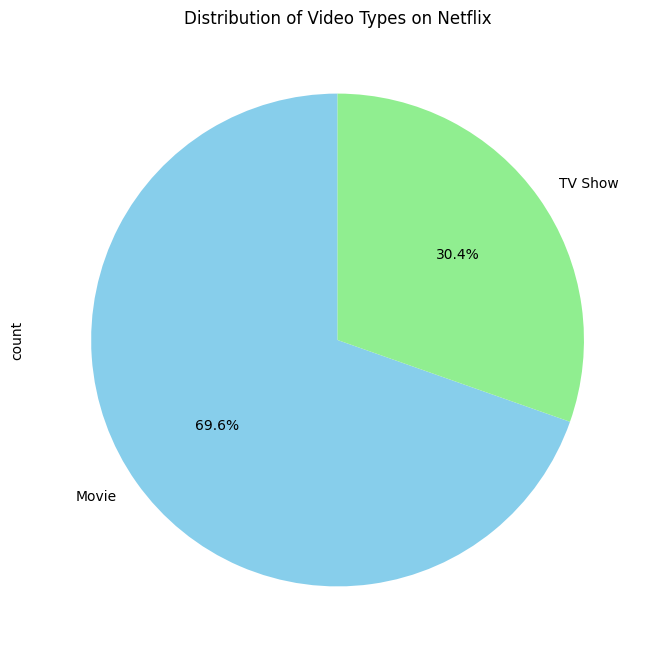

In [8]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'], figsize=(8, 8))
plt.title('Distribution of Video Types on Netflix')
plt.show()

From the pie chart, we can observe that the distibution of movies and TV shows are nearly 7:3

In [9]:
# Get the Movie and TV_show Dataset
movie_df = df[df['type'] == 'Movie']
tv_show_df = df[df['type'] == 'TV Show']

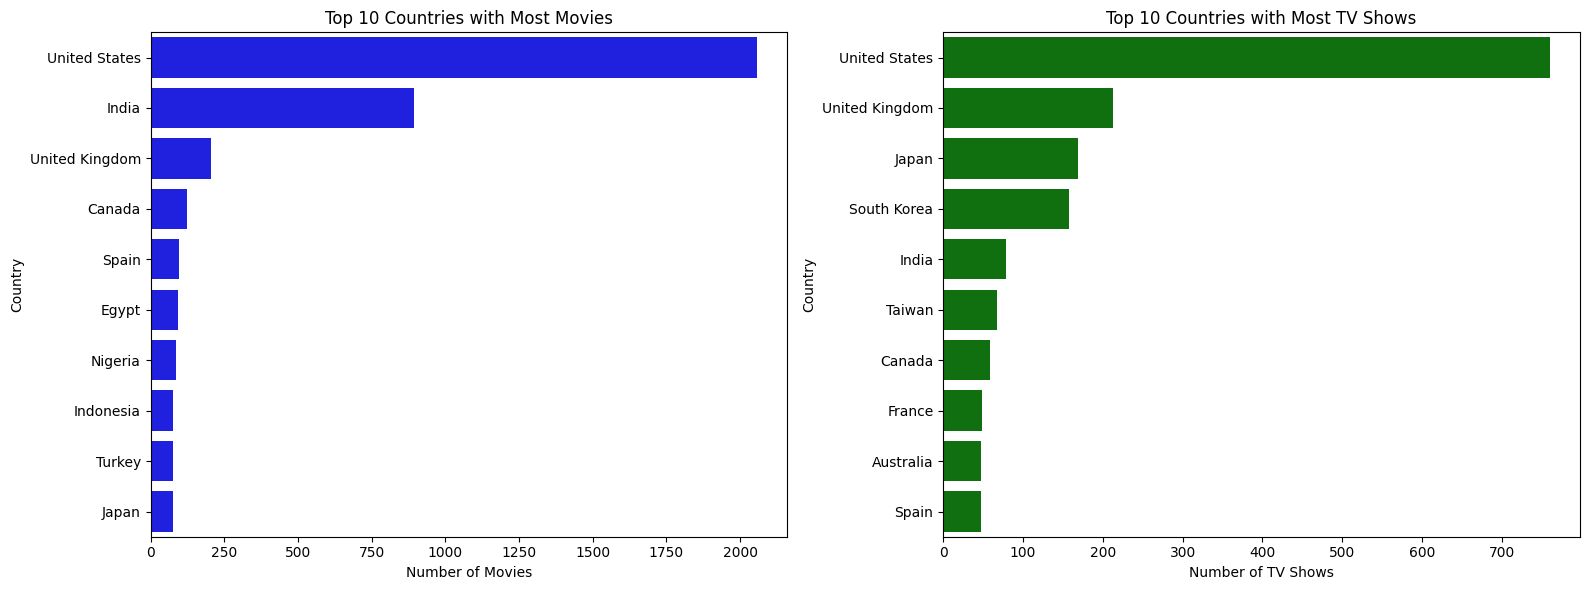

In [10]:
# Exclude rows with 'unknown' country
movies_df_filtered = movie_df[movie_df['country'] != 'unknown']
tv_shows_df_filtered = tv_show_df[tv_show_df['country'] != 'unknown']

# Get the top 10 countries with the most movies and TV shows
top_movies_countries = movies_df_filtered['country'].value_counts().head(10)
top_tv_shows_countries = tv_shows_df_filtered['country'].value_counts().head(10)

# Plotting using seaborn
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for top 10 movies countries
sns.barplot(x=top_movies_countries.values, y=top_movies_countries.index, color='blue', ax=axes[0])
axes[0].set_title('Top 10 Countries with Most Movies')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Country')

# Bar plot for top 10 TV shows countries
sns.barplot(x=top_tv_shows_countries.values, y=top_tv_shows_countries.index, color='green', ax=axes[1])
axes[1].set_title('Top 10 Countries with Most TV Shows')
axes[1].set_xlabel('Number of TV Shows')
axes[1].set_ylabel('Country')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the bar plot, we can find that the United States ranks first in both the number of movies and the number of TV series on Netflix

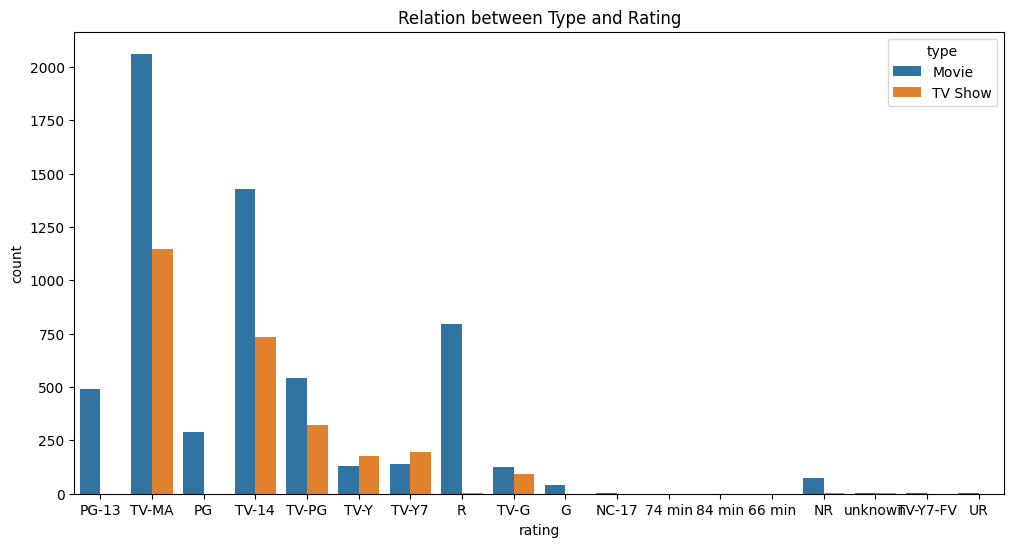

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()


In the bar plot about movie ratings, we can find that the TV-MA category accounts for the majority of movies and TV series.

## 3. Time Series Analysis

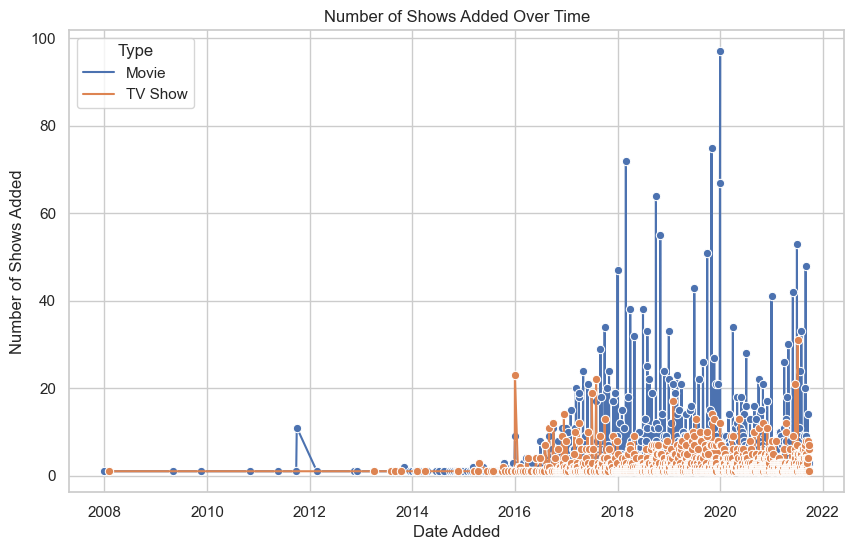

In [12]:
# Assuming 'type' column exists in your DataFrame
shows_added = df.groupby(["date_added", "type"])[["show_id"]].count().reset_index()
shows_added = shows_added.rename(columns={"show_id": "Number_of_shows_added"})

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use hue parameter to separate movies and TV shows
sns.lineplot(data=shows_added, x="date_added", y="Number_of_shows_added", hue="type", marker="o")

plt.title('Number of Shows Added Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Shows Added')
plt.legend(title='Type')
plt.show()

From the above time series plot we can see that Netflix has been focusing heavily on movies in the last few years. Now lets take a closer look to the data behind 2016.

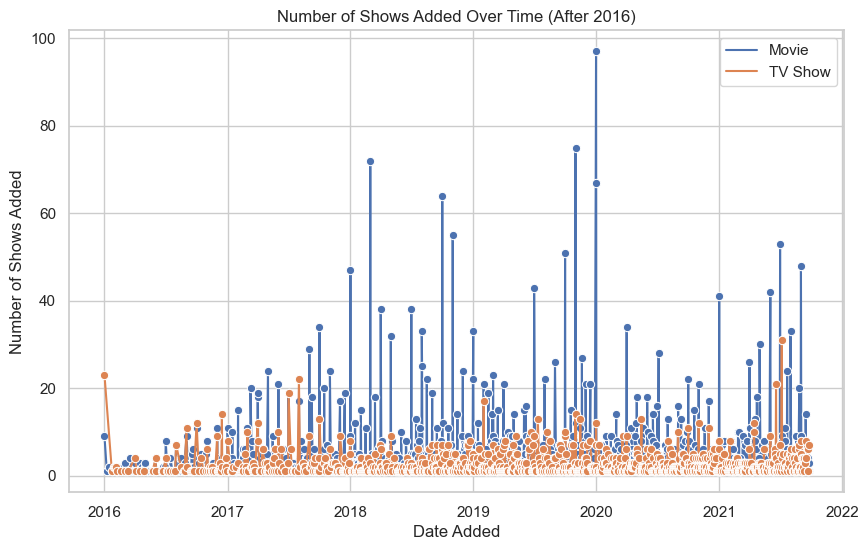

In [13]:
df_after_2016 = df[df['date_added'].dt.year >= 2016]

# Group by date_added and type, count the number of shows added
shows_added_after_2016 = df_after_2016.groupby(["date_added", "type"])[["show_id"]].count().reset_index()
shows_added_after_2016 = shows_added_after_2016.rename(columns={"show_id": "Number_of_shows_added"})

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot for movies
sns.lineplot(data=shows_added_after_2016, x="date_added", y="Number_of_shows_added", hue="type", marker="o")

plt.title('Number of Shows Added Over Time (After 2016)')
plt.xlabel('Date Added')
plt.ylabel('Number of Shows Added')
plt.legend()

plt.show()

From this more detailed time series plot after year 2016, we can observe that Netflix added the most number of movies in 2019. However, because of Covid-19 epidemic, the number of movies added suddetnly decreased a lot. Recently, it has improved due to the gradual subsidence of the epidemic.

### (a) Forecasting the number of Movies in the future

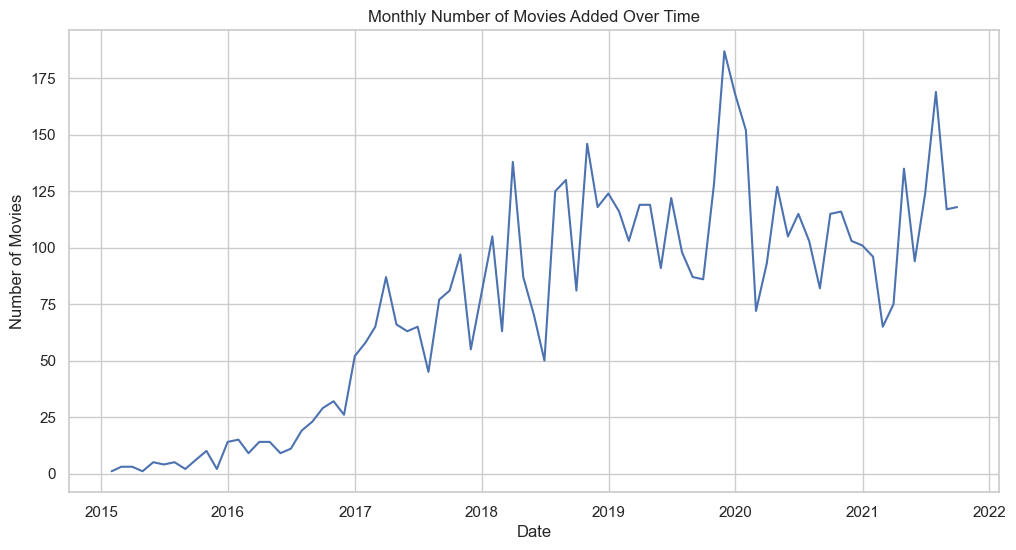

In [14]:
movie_df = df[df['type'] == 'Movie']
movie_df = movie_df[movie_df['date_added'].dt.year >= 2015]
# Set 'date_added' as the index
movie_df.set_index('date_added', inplace=True)

# Resample to monthly data, summing up the counts for each month
movie_df_resampled = movie_df.resample('M').size()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(movie_df_resampled, linestyle='-')
plt.title('Monthly Number of Movies Added Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

First, lets only select the data of movies and see the time series plot. 

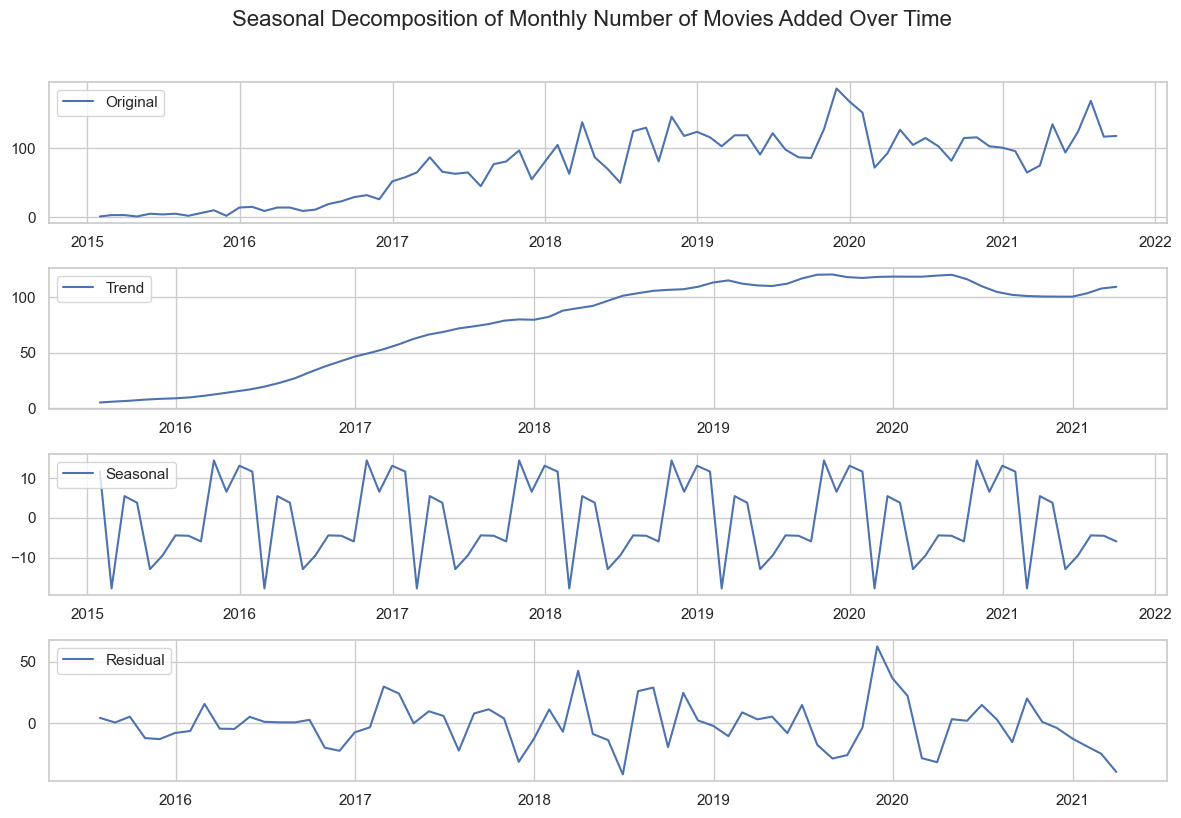

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(movie_df_resampled)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.suptitle('Seasonal Decomposition of Monthly Number of Movies Added Over Time', y=1.02, fontsize=16)

plt.subplot(411)
plt.plot(movie_df_resampled, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


From the decompostion of movie's time series plot, we can observe that there are clearly seasonal and increasing trends of our data. 

ADF Statistic: -1.483003247361892
p-value: 0.5419020096622343
Critical Values:
   1%: -3.524624466842421
   5%: -2.9026070739026064
   10%: -2.5886785262345677


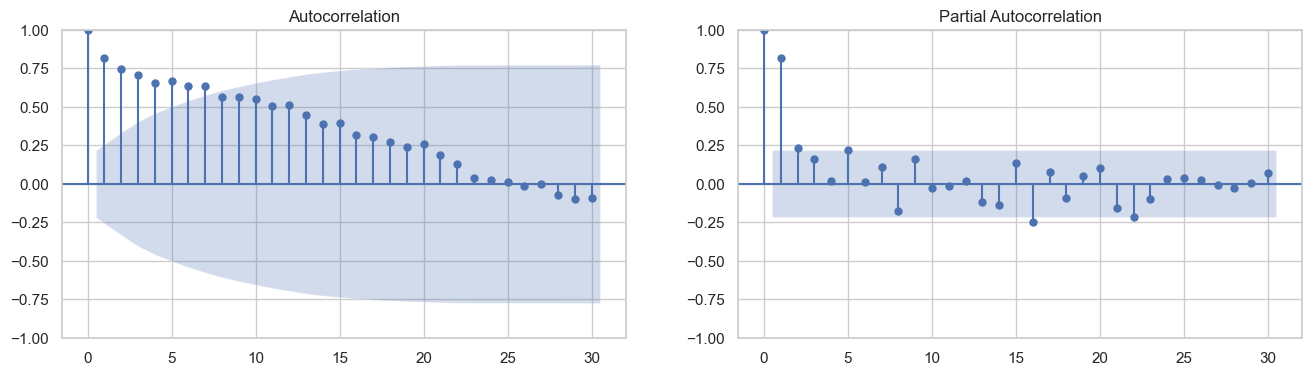

In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(movie_df_resampled)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(movie_df_resampled, lags=30, ax=ax1)
plot_pacf(movie_df_resampled, lags=30, ax=ax2)
plt.show()

Using the Augmented Dickey-Fuller (ADF) test, we can see that the p-value is significantly larger than 0.05, so we reject the null hypohesis and conclude that the data is not stationary.

Also, from the ACF plot and PACF plto, the ACF decreases gradually and the PACF has a sharp drop, so we need a first-order differencing.

In [17]:
# Split the Data into Training and Test Sets
cutoff_date = '2021-01-01'
train_set = movie_df_resampled[movie_df_resampled.index < cutoff_date]
test_set = movie_df_resampled[movie_df_resampled.index >= cutoff_date]

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 2. Fit SARIMA Model on the Training Set
order = (2, 1, 8)
seasonal_order = (2, 1, 8, 12)
model = SARIMAX(train_set, order=order, seasonal_order=seasonal_order)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96945D+00    |proj g|=  2.52247D-01


 This problem is unconstrained.



At iterate    5    f=  3.91434D+00    |proj g|=  4.07959D-02

At iterate   10    f=  3.90444D+00    |proj g|=  1.33032D-02

At iterate   15    f=  3.84866D+00    |proj g|=  8.45101D-02

At iterate   20    f=  3.81358D+00    |proj g|=  5.02480D-02

At iterate   25    f=  3.78932D+00    |proj g|=  2.87748D-02

At iterate   30    f=  3.76825D+00    |proj g|=  1.24001D-01

At iterate   35    f=  3.75698D+00    |proj g|=  6.11748D-02

At iterate   40    f=  3.75583D+00    |proj g|=  7.42498D-03

At iterate   45    f=  3.75460D+00    |proj g|=  1.74614D-02

At iterate   50    f=  3.75436D+00    |proj g|=  1.55062D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# 3. Make Predictions on the Test Set
predictions = results.get_forecast(steps=len(test_set))

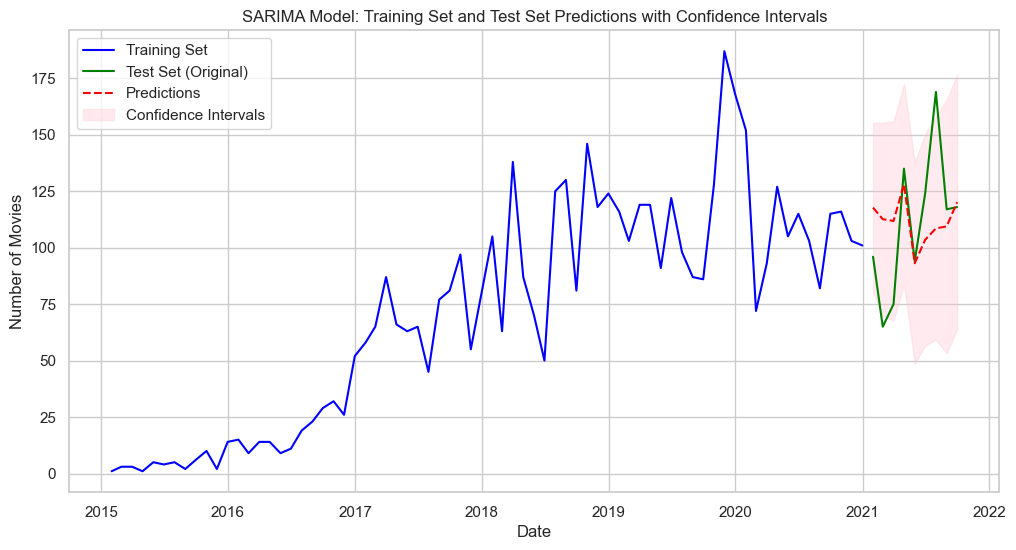

In [20]:

# Get confidence intervals for the predictions
confidence_intervals = predictions.conf_int()

# Plot the Original Test Set, Predictions, and Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(train_set, label='Training Set', color='blue')
plt.plot(test_set, label='Test Set (Original)', color='green')
plt.plot(predictions.predicted_mean, label='Predictions', linestyle='--', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

plt.title('SARIMA Model: Training Set and Test Set Predictions with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()


From the forecast chart, we can see that although our forecast results are conservative, I think the cause of the problem is the alleviation of the epidemic. After 2021, the epidemic will gradually dissipate and more movies will appear.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11659D+00    |proj g|=  2.65493D-01

At iterate    5    f=  3.96386D+00    |proj g|=  1.95642D-02

At iterate   10    f=  3.95589D+00    |proj g|=  1.92393D-02

At iterate   15    f=  3.92422D+00    |proj g|=  9.85531D-02

At iterate   20    f=  3.89653D+00    |proj g|=  6.40367D-02

At iterate   25    f=  3.86791D+00    |proj g|=  9.15648D-02

At iterate   30    f=  3.85944D+00    |proj g|=  3.02296D-02

At iterate   35    f=  3.85740D+00    |proj g|=  5.07321D-02

At iterate   40    f=  3.85378D+00    |proj g|=  2.11423D-02

At iterate   45    f=  3.85210D+00    |proj g|=  2.85838D-02

At iterate   50    f=  3.85106D+00    |proj g|=  2.79793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-10-31    134.908061
2021-11-30    143.514403
2021-12-31    137.030161
2022-01-31    137.873160
2022-02-28    131.355563
2022-03-31    120.692698
2022-04-30    149.502403
2022-05-31    140.491090
2022-06-30    147.984164
2022-07-31    161.156414
2022-08-31    147.024113
2022-09-30    148.566590
Freq: M, Name: predicted_mean, dtype: float64


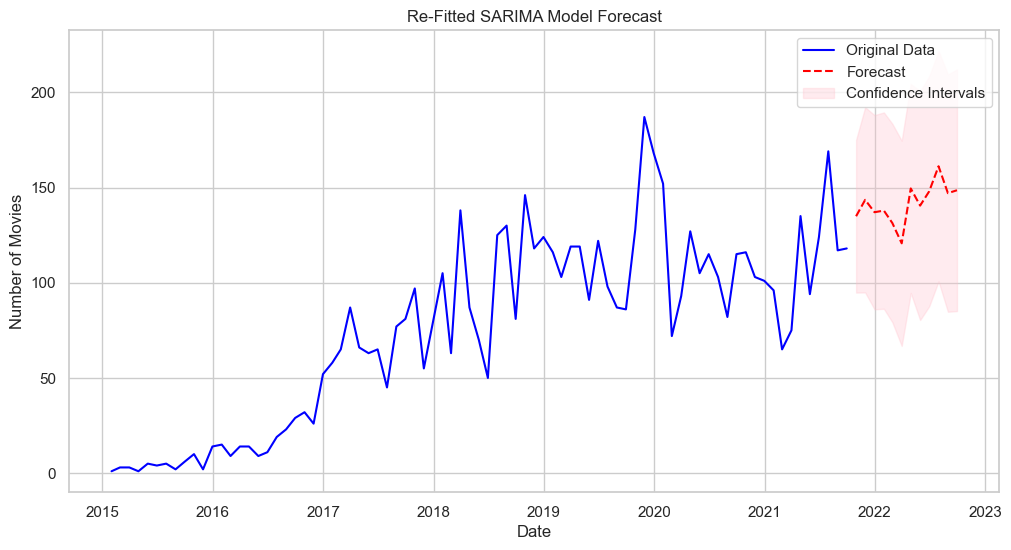

In [21]:
# Specify SARIMA model order
order = (2, 1, 8)
seasonal_order = (2, 1, 8, 12)

# Fit SARIMA model on the entire dataset
model = SARIMAX(movie_df_resampled, order=order, seasonal_order=seasonal_order)
refitted_results = model.fit()

# Forecast the next 12 steps
forecast_steps = 12
forecast = refitted_results.get_forecast(steps=forecast_steps)

# Access the predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print and plot the forecast
print(forecast_mean)

# Plot the original data, the forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(movie_df_resampled, label='Original Data', color='blue')
plt.plot(forecast_mean, label='Forecast', linestyle='--', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

plt.title('Re-Fitted SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()


## 4. Network Analysis 

In [22]:
movie_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year', 'month', 'day', 'directors', 'categories', 'actors',
       'countries'],
      dtype='object')

In [23]:

movie_df = df[df['type'] == 'Movie']
movie_df = movie_df[movie_df['date_added'].dt.year >= 2015]
# Set 'date_added' as the index
movie_df.set_index('date_added', inplace=True)

# Since there exists $ symbol in names, I choose to revise it.
def replace_actor(actor_list):
    return ['Joey BadaSS' if actor == 'Joey Bada$$' else actor for actor in actor_list]
movie_df['actors'] = movie_df['actors'].apply(replace_actor)
def replace_director(director_list):
    return ['Joey BadaSS' if director == 'Joey Bada$$' else director for director in director_list]
movie_df['directors'] = movie_df['directors'].apply(replace_director)

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Add constraint: Consider only movies from the United States
df_us = movie_df[(movie_df['country'] == 'United States') & 
                 ~movie_df['directors'].apply(lambda x: 'unknown' in x) & 
                 ~movie_df['actors'].apply(lambda x: 'unknown' in x)]

# Creating actor and director lists
actors_list = []
for actors in df_us['actors']:
    actors_list.extend(actors)
actors_list = list(set(actors_list))

directors_list = []
for directors in df_us['directors']:
    directors_list.extend(directors)
directors_list = list(set(directors_list))

# Creating dataframes for actor count and director count and populating them
actor_count = pd.DataFrame({'Name': actors_list})
actor_count['Count'] = actor_count['Name'].apply(lambda actor: sum(df_us['actors'].apply(lambda actors: actor in actors)))

director_count = pd.DataFrame({'Name': directors_list})
director_count['Count'] = director_count['Name'].apply(lambda director: sum(df_us['directors'].apply(lambda directors: director in directors)))



Max connections: ('Steve Brill', 11)


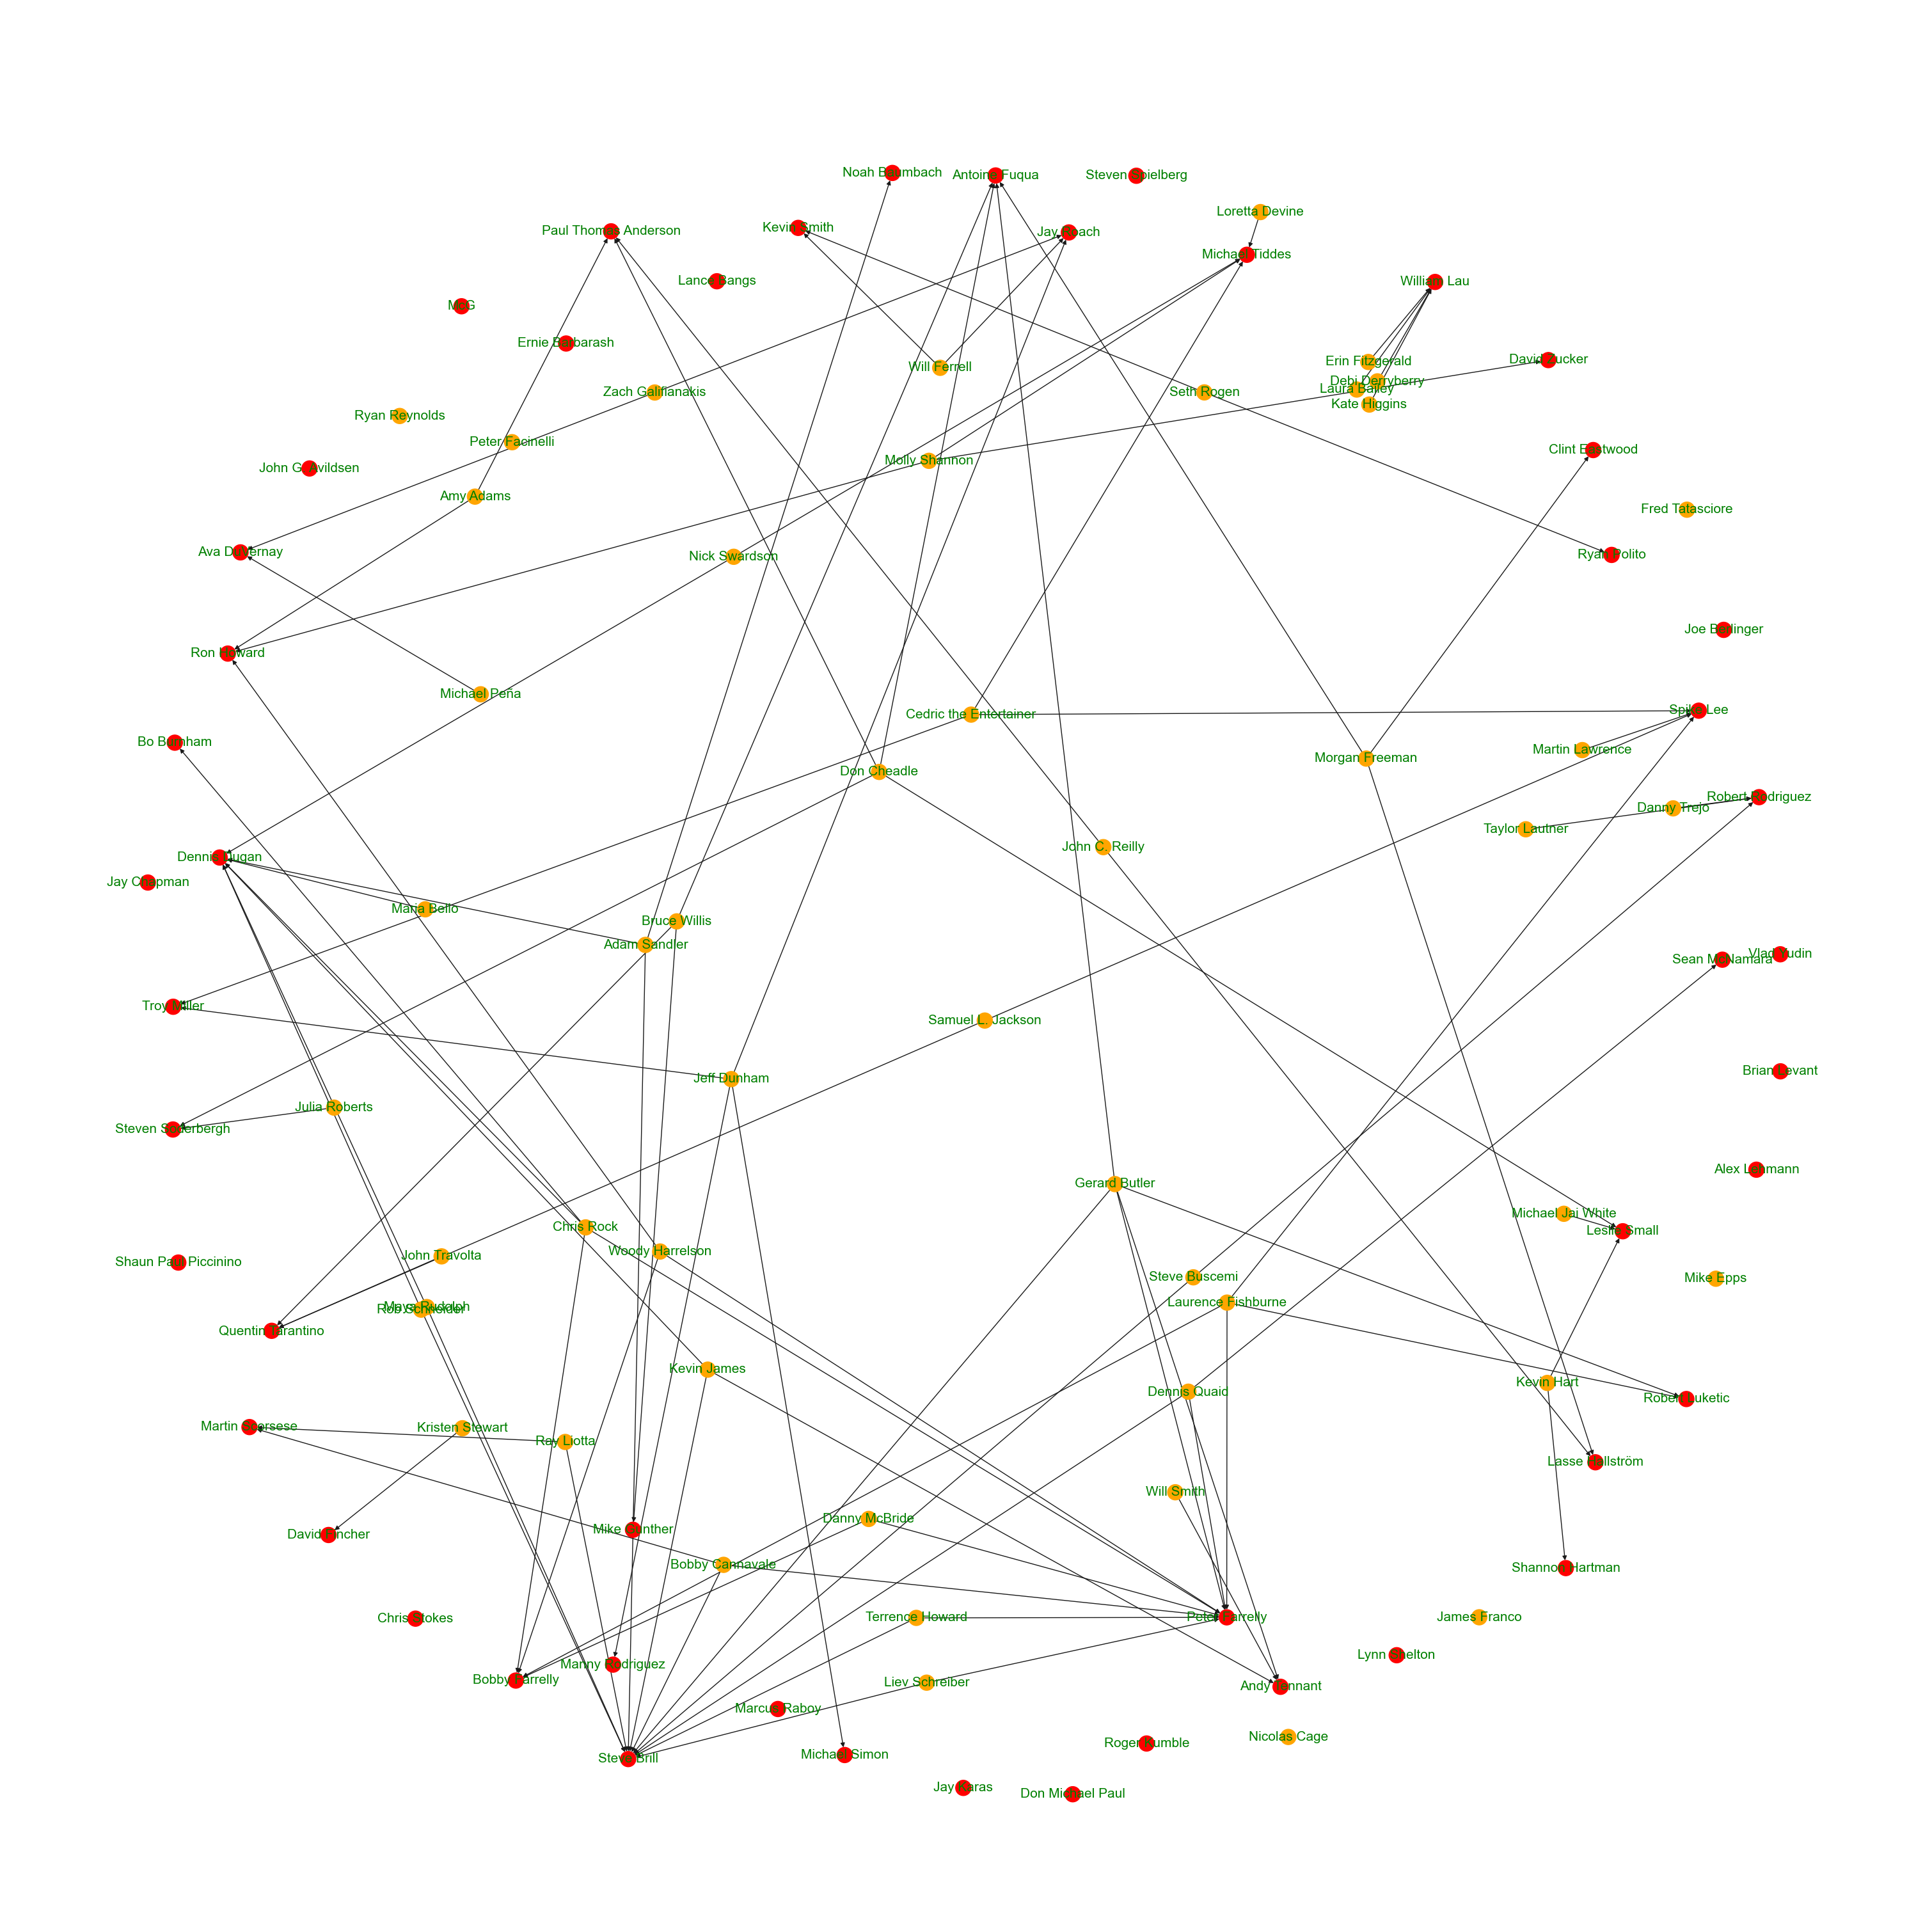

In [53]:
# Suppose we need top50 directors and actors
top_n_actors = 50
top_n_directors = 50
top_actors = actor_count.nlargest(top_n_actors, 'Count')
top_directors = director_count.nlargest(top_n_directors, 'Count')

# Draw the network graph
G = nx.DiGraph()
for actor in top_actors['Name']:
    G.add_node(actor)
for director in top_directors['Name']:
    G.add_node(director)
for actor in top_actors['Name']:
    for director in top_directors['Name']:
        if any(actor in actors and director in directors for actors, directors in zip(df_us['actors'], df_us['directors'])):
            G.add_edge(actor, director)

# Blue nodes for actors and red for directors
color_map = ['orange' if node in top_actors['Name'].values else 'red' for node in G.nodes]

plt.figure(1, figsize=(30, 30))
nx.draw(G, node_color=color_map, with_labels=True, font_color='green', font_size=15)
print('Max connections: ' + str(max(dict(G.degree()).items(), key=lambda x: x[1])))
plt.show()

In [26]:
# Creating graphs for actor and director collaborations
actor_graph = nx.Graph()
director_graph = nx.Graph()

for _, row in df_us.iterrows():
    for actor1 in row['actors']:
        for actor2 in row['actors']:
            if actor1 != actor2:
                actor_graph.add_edge(actor1.strip(), actor2.strip())
    for director in row['directors']:
        for actor in row['actors']:
            director_graph.add_edge(director.strip(), actor.strip())

# Computing degree centrality for actors and directors
actor_degree_centrality = nx.degree_centrality(actor_graph)
director_degree_centrality = nx.degree_centrality(director_graph)

# Sorting actors and directors based on degree centrality
sorted_actors = sorted(actor_degree_centrality, key=actor_degree_centrality.get, reverse=True)[:10]
sorted_directors = sorted(director_degree_centrality, key=director_degree_centrality.get, reverse=True)[:10]

# Creating DataFrames for Top 10 Actors and Directors
top_10_actors = pd.DataFrame({'Name': sorted_actors, 'Degree Centrality': [actor_degree_centrality[a] for a in sorted_actors]})
top_10_directors = pd.DataFrame({'Name': sorted_directors, 'Degree Centrality': [director_degree_centrality[d] for d in sorted_directors]})


In [27]:
print("Top 10 Actors by Collaborations using Degree Centrality:")
print(top_10_actors)
print("\nTop 10 Directors by Collaborations using Degree Centrality:")
print(top_10_directors)

Top 10 Actors by Collaborations using Degree Centrality:
                Name  Degree Centrality
0  Samuel L. Jackson           0.020467
1       Adam Sandler           0.019547
2       Dennis Quaid           0.018512
3    Terrence Howard           0.016327
4     Liev Schreiber           0.015753
5       Maya Rudolph           0.014718
6    Bobby Cannavale           0.014258
7       James Franco           0.013798
8       Fred Armisen           0.013683
9       Nicolas Cage           0.013568

Top 10 Directors by Collaborations using Degree Centrality:
                Name  Degree Centrality
0        Steve Brill           0.008936
1    Martin Scorsese           0.007954
2     Peter Farrelly           0.006481
3         Steve Carr           0.006088
4    Elizabeth Banks           0.005499
5  Quentin Tarantino           0.005401
6   Steven Spielberg           0.005302
7     Clint Eastwood           0.005302
8      David Fincher           0.005008
9   Robert Rodriguez           0.005008


In [28]:
# Computing betweenness centrality for actors and directors
actor_betweenness_centrality = nx.betweenness_centrality(actor_graph)
director_betweenness_centrality = nx.betweenness_centrality(director_graph)

# Sorting actors and directors based on betweenness centrality
sorted_actors_betweenness = sorted(actor_betweenness_centrality, key=actor_betweenness_centrality.get, reverse=True)[:10]
sorted_directors_betweenness = sorted(director_betweenness_centrality, key=director_betweenness_centrality.get, reverse=True)[:10]

# Creating DataFrames for Top 10 Actors and Directors based on betweenness centrality
top_10_actors_betweenness = pd.DataFrame({'Name': sorted_actors_betweenness, 'Betweenness Centrality': [actor_betweenness_centrality[a] for a in sorted_actors_betweenness]})
top_10_directors_betweenness = pd.DataFrame({'Name': sorted_directors_betweenness, 'Betweenness Centrality': [director_betweenness_centrality[d] for d in sorted_directors_betweenness]})


In [29]:
print("Top 10 Actors by Collaborations using Betweenness Centrality:")
print(top_10_actors_betweenness)
print("\nTop 10 Directors by Collaborations using Betweenness Centrality:")
print(top_10_directors_betweenness)

Top 10 Actors by Collaborations using Betweenness Centrality:
                Name  Betweenness Centrality
0  Samuel L. Jackson                0.027149
1       Dennis Quaid                0.018353
2    Terrence Howard                0.015828
3       Adam Sandler                0.013262
4    Fred Tatasciore                0.012922
5       Nicolas Cage                0.012026
6      John Travolta                0.011812
7     Liev Schreiber                0.011687
8         Ray Liotta                0.011018
9         Chris Rock                0.010276

Top 10 Directors by Collaborations using Betweenness Centrality:
                Name  Betweenness Centrality
0        Steve Brill                0.054100
1  Quentin Tarantino                0.031102
2       Dennis Quaid                0.025990
3     Peter Farrelly                0.023792
4     Garry Marshall                0.022859
5   Robert Rodriguez                0.020163
6      Antoine Fuqua                0.019875
7    Martin Scors

In [30]:
# Computing eigenvector centrality for actors and directors
actor_eigenvector_centrality = nx.eigenvector_centrality(actor_graph)
director_eigenvector_centrality = nx.eigenvector_centrality(director_graph)

# Sorting actors and directors based on eigenvector centrality
sorted_actors_eigenvector = sorted(actor_eigenvector_centrality, key=actor_eigenvector_centrality.get, reverse=True)[:10]
sorted_directors_eigenvector = sorted(director_eigenvector_centrality, key=director_eigenvector_centrality.get, reverse=True)[:10]

# Creating DataFrames for Top 10 Actors and Directors based on eigenvector centrality
top_10_actors_eigenvector = pd.DataFrame({'Name': sorted_actors_eigenvector, 'Eigenvector Centrality': [actor_eigenvector_centrality[a] for a in sorted_actors_eigenvector]})
top_10_directors_eigenvector = pd.DataFrame({'Name': sorted_directors_eigenvector, 'Eigenvector Centrality': [director_eigenvector_centrality[d] for d in sorted_directors_eigenvector]})


In [31]:
print("Top 10 Actors by Collaborations using Eigenvector Centrality:")
print(top_10_actors_eigenvector)
print("\nTop 10 Directors by Collaborations using Eigenvector Centrality:")
print(top_10_directors_eigenvector)

Top 10 Actors by Collaborations using Eigenvector Centrality:
                Name  Eigenvector Centrality
0    Terrence Howard                0.142241
1         Emma Stone                0.121160
2      Jack McBrayer                0.116736
3     Liev Schreiber                0.115964
4    Bobby Cannavale                0.114865
5  Patrick Warburton                0.113965
6    Elizabeth Banks                0.112464
7       Dennis Quaid                0.108843
8      Gerard Butler                0.108226
9       Maya Rudolph                0.107010

Top 10 Directors by Collaborations using Eigenvector Centrality:
                    Name  Eigenvector Centrality
0        Elizabeth Banks                0.292807
1            Steve Brill                0.217448
2         Peter Farrelly                0.205766
3             Steve Carr                0.204265
4           Brett Ratner                0.197621
5         Rusty Cundieff                0.197237
6          Griffin Dunne          

## 5. Recommendation System 

In [46]:
rec_df = df.copy()
contents = ['title','type','director','cast','country','rating','listed_in','description']
rec_df = rec_df[contents]

def data_cleaning(x):
        return str.lower(x.replace(" ", ""))
for content in contents:
    rec_df[content] = rec_df[content].apply(data_cleaning)    
rec_df.head()

,title,type,director,cast,country,rating,listed_in,description
0,dickjohnsonisdead,movie,kirstenjohnson,unknown,unitedstates,pg-13,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,tvshow,unknown,"amaqamata,khosingema,gailmabalane,thabangmolab...",southafrica,tv-ma,"internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,tvshow,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...",unknown,tv-ma,"crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,tvshow,unknown,unknown,unknown,tv-ma,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,tvshow,unknown,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...",india,tv-ma,"internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [47]:
rec_df['text_content'] = (rec_df['title'] + " " + rec_df['type']+ " " + rec_df['director']+ " " + rec_df['cast'] 
                          + " " + rec_df['country']+ " " + rec_df['rating'] + " " + rec_df['listed_in']+ " "+ rec_df['description'])
rec_df.head()

,title,type,director,cast,country,rating,listed_in,description,text_content
0,dickjohnsonisdead,movie,kirstenjohnson,unknown,unitedstates,pg-13,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead movie kirstenjohnson unknown...
1,blood&water,tvshow,unknown,"amaqamata,khosingema,gailmabalane,thabangmolab...",southafrica,tv-ma,"internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water tvshow unknown amaqamata,khosingem..."
2,ganglands,tvshow,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...",unknown,tv-ma,"crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...","ganglands tvshow julienleclercq samibouajila,t..."
3,jailbirdsneworleans,tvshow,unknown,unknown,unknown,tv-ma,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein...",jailbirdsneworleans tvshow unknown unknown unk...
4,kotafactory,tvshow,unknown,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...",india,tv-ma,"internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...,"kotafactory tvshow unknown mayurmore,jitendrak..."


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

countvect = CountVectorizer(stop_words='english') 
count_matrix = countvect.fit_transform(rec_df['text_content']) 
cosine_sim = cosine_similarity(count_matrix)
indices = pd.Series(rec_df.index, index=rec_df['title'])

def recommendations(title):
    title = title.replace(' ','').lower()
    if title not in indices.index:
        return "Title was not found in our resource library"
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i[0] for i in sim_scores]
    recommendations_df = pd.DataFrame({
        "Recommendation": df['title'].iloc[movie_indices].values
    })
    return recommendations_df

In [49]:
recommendations('Stranger Things')

,Recommendation
0,Beyond Stranger Things
1,The Umbrella Academy
2,The Twilight Zone (Original Series)
3,Motown Magic
4,Manifest
5,The Messengers
6,The 4400
7,Mystery Science Theater 3000: The Return
8,Nightflyers
9,The Vampire Diaries


In [50]:
recommendations('Jaws')

,Recommendation
0,Jaws 2
1,Poseidon
2,Jaws: The Revenge
3,Indiana Jones and the Temple of Doom
4,Mutiny on the Bounty
5,Rocky
6,Indiana Jones and the Raiders of the Lost Ark
7,Cleopatra Jones
8,Indiana Jones and the Last Crusade
9,Adrift


In [51]:
recommendations('Avengers: Endgame')

'Title was not found in our resource library'